# GRIP : The Spark Foundation- Data Science & Business Analytics Internship

## Task 1 : Prediction Using Supervised Machine Learning

Simple linear Regression with Scikit learn


Problem Statement : Predict expected percent score of student based on the no. of study hours.
 
 
In this data we are dealing with only two variables.

### Author : Dipali Jalindar Raut

In [17]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [18]:
url = "http://bit.ly/w-data"         # Data is stored in given link.
df = pd.read_csv(url)
print("Data imported successfully")
df.head()                            # Display the first five rows of dataframe.

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
print('Shape of the dataset :',df.shape)
print('Columns names :',df.columns)
print('Columns Datatypes :',df.dtypes)

Shape of the dataset : (25, 2)
Columns names : Index(['Hours', 'Scores'], dtype='object')
Columns Datatypes : Hours     float64
Scores      int64
dtype: object


In [20]:
# Checking any missing values in data
df.isna().values.any()

False

### There is no missing values present in data so no need to the clean data, we can proceed for the further analysis.

## Define the dependent and independent variables

In [21]:
# following the regression equation ,our dependent variable(y)is the scores.
y = df["Scores"]
# independent variable (x) is the hours
x = df["Hours"]

## Explore the Data

Plot the scatterplot to check the relation between the Scores and the Study Hours.

Text(0, 0.5, 'Percentage Score')

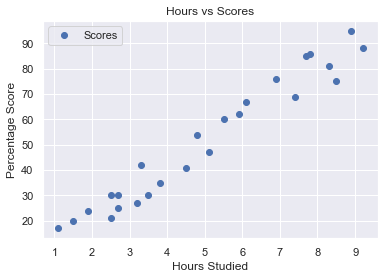

In [22]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o') 
#%matplotlib inline
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
#plt.scatter(df.Hours,df.Scores,colour="red",marker="+")

### From the above scatterplot , we can clearly see that there is a positive linear relationship between the number of study hours and percentage of score.

## Data Preparation

#### Prepare a data as a dependent and independent variables:

#### x(hours studied) as a independent variable and 

#### y(Score) as a dependent variable.

In [23]:
x = df.iloc[:,:-1].values  #iloc[] command is helps us to select specific number of row or column from the dataset.
y = df.iloc[:,1].values    #Gives observation of 2nd column.

## Train_Test_Split





Now we will split the data into training and testing sets with splitting rule 80-20.Here we use train_test_split method using sklearn library.

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2,shuffle =True)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


### Training the model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print("Training Completed Successfully.")

Training Completed Successfully.


In [26]:
model.coef_       # Gives slope of regression line.

array([9.94061514])

In [27]:
model.intercept_  # Gives intercept of regression line.

1.5079104828268726

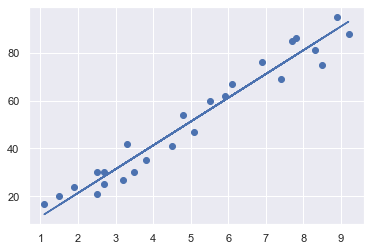

In [28]:
# Replotting Regression Line
line = model.coef_*x+model.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);#,matplotlib.colour="red");
plt.show()

## Making Predictions





Now we have trained our model.it's time to make some predictions.

In [29]:
print(x_test)                   # Testing data (In Hours)
y_pred = model.predict(x_test)  # Predicting the scores

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [14]:
# Comparing Actual v/s Predicted values.
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


## As our task , let's predict the score when study hours are 9.25

In [30]:
hours = 9.25
my = model.predict([[hours]])
print(f"Number of hours : {hours}")
print(f"Predicted Scores : {my}")

Number of hours : 9.25
Predicted Scores : [93.45860056]


### Which shows that if student will study for 9.25 hours then he will get percent score of 93.45%

### Model Evaluation



The most important task is to check the performance of the model.

Use R-square.Mean Square Error and Mean Absolute Error.

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
print("R_square:",r2_score(y_test,y_pred)) 
print("MSE:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))

R_square: 0.9735538080811826
MSE: 24.38762033985666
Mean Absolute Error: 4.877039354964484


Here R_Square value is 0.9735 which shows that 97.35% of variation in the outcome(dependent) variable is explained by independent variable.That is our model gives 97.35% accurate results.

## Conclusions:

i)Accuracy of our model is 97.35%

ii)Model predicts that if a student studies for 9.25 hours per day then he/she will score 93.45%.

## Thank you!!!